# **Import Data**

In [178]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset into a variable and remove unwanted columns/features from the dataframe.

In [179]:
data = pd.read_csv("Customer_Churn_Data.csv")
data.drop(['RowNumber'], axis='columns', inplace=True)
data.drop(['Surname'], axis='columns', inplace=True)
data.shape

(10000, 12)

# **DATA EXPLORATION**

In [180]:
print("Overall shape of the dataframe: ", data.shape,"\n")

Overall shape of the dataframe:  (10000, 12) 



In [181]:
print("Number of rows: ", data.shape[0],"\n")

Number of rows:  10000 



In [182]:
print("Number of columns/features: ", data.shape[1],"\n")

Number of columns/features:  12 



In [183]:
print("Data Features: ", data.columns.tolist(),"\n")

Data Features:  ['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 



In [184]:
# Display the first few rows of the dataset
print(data.head())

   CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0  


In [185]:
# Get basic statistics of numerical features
print(data.describe())

         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   

In [186]:
# Check for missing values
print(data.isnull().sum())

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [187]:
# Check the distribution of target variable (Exited)
print(data['Exited'].value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


# **DATA PREPARATION**

We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [188]:
# Split Train, test data
data_train = data.sample(frac=0.8,random_state=200)
data_test = data.drop(data_train.index)
print(len(data_train))
print(len(data_test))

8000
2000


(-1.0, 5.0)

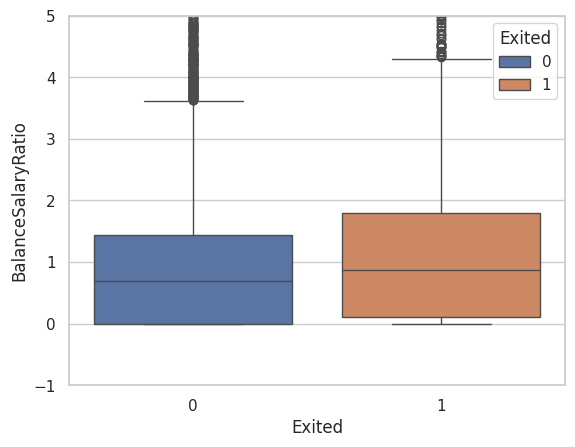

In [189]:
data_train['BalanceSalaryRatio'] = data_train.Balance/data_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = data_train)
plt.ylim(-1, 5)

We have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

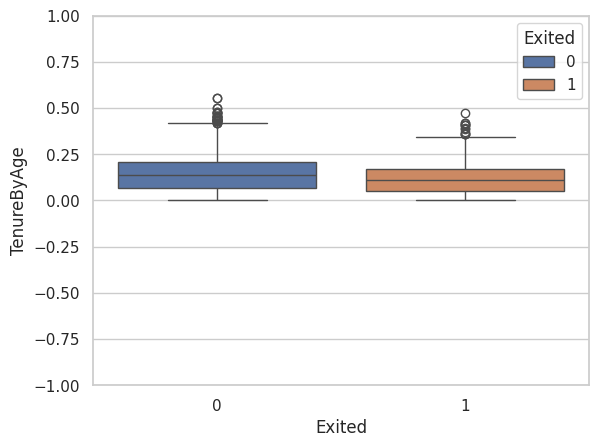

In [190]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
data_train['TenureByAge'] = data_train.Tenure/(data_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = data_train)
plt.ylim(-1, 1)
plt.show()

In [191]:
#Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
data_train['CreditScoreGivenAge'] = data_train.CreditScore/(data_train.Age)

In [192]:
# Resulting Data Frame
data_train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,15637427,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,15793046,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,15658972,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,15679048,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,15582276,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [193]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
data_train = data_train[['Exited'] + continuous_vars + cat_vars]
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [194]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
where the attribute in inapplicable instead of 0'''
data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [195]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (data_train[i].dtype == str or data_train[i].dtype == object):  # Use 'str' or 'object' instead of np.str
        for j in data_train[i].unique():
            data_train[i+'_'+j] = np.where(data_train[i] == j, 1, -1)
        remove.append(i)
data_train = data_train.drop(remove, axis=1)
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [196]:
# Min Max scaling the continuous variables
minVec = data_train[continuous_vars].min().copy()
maxVec = data_train[continuous_vars].max().copy()
data_train[continuous_vars] = (data_train[continuous_vars]-minVec)/(maxVec-minVec)
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [197]:
# Data prepẩtion pipeline for test data
def DataPrepPipeline(data_predict,data_train_Cols,minVec,maxVec):
    # Add new features
    data_predict['BalanceSalaryRatio'] = data_predict.Balance/data_predict.EstimatedSalary
    data_predict['TenureByAge'] = data_predict.Tenure/(data_predict.Age - 18)
    data_predict['CreditScoreGivenAge'] = data_predict.CreditScore/(data_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"]
    data_predict = data_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    data_predict.loc[data_predict.HasCrCard == 0, 'HasCrCard'] = -1
    data_predict.loc[data_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in data_predict[i].unique():
            data_predict[i+'_'+j] = np.where(data_predict[i] == j,1,-1)
        remove.append(i)
    data_predict = data_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(data_train_Cols) - set(data_predict.columns))
    for l in L:
        data_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    data_predict[continuous_vars] = (data_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    data_predict = data_predict[data_train_Cols]
    return data_predict

# **DATA VISUALIZATION**

In [198]:
colors = ["firebrick", "lightblue", "darkorange", "slategray"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

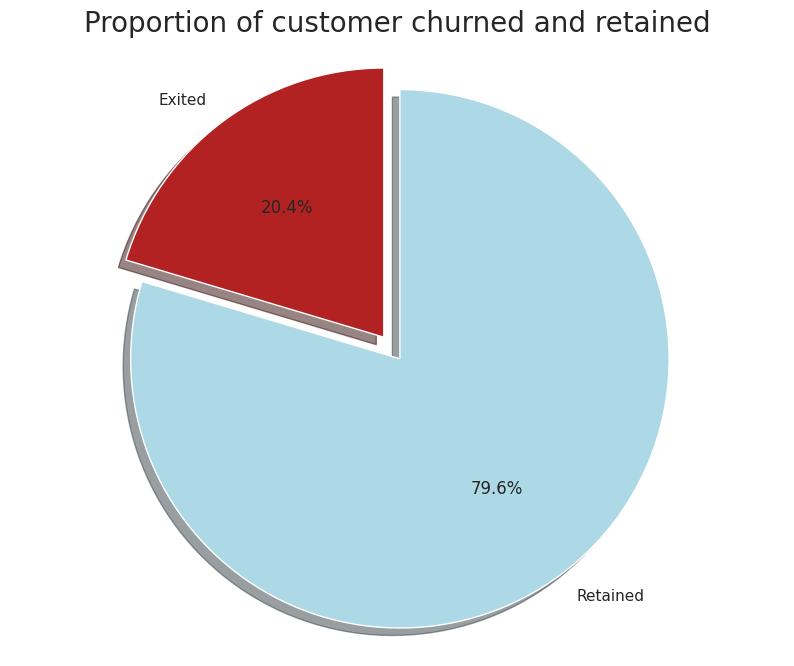

In [199]:
# Visualize the distribution of churn
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

20.4% of the customers have churned. Given that 20.4% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20.4% as it is of interest to the bank to identify and keep this bunch instead of accurately predicting the retained customers.

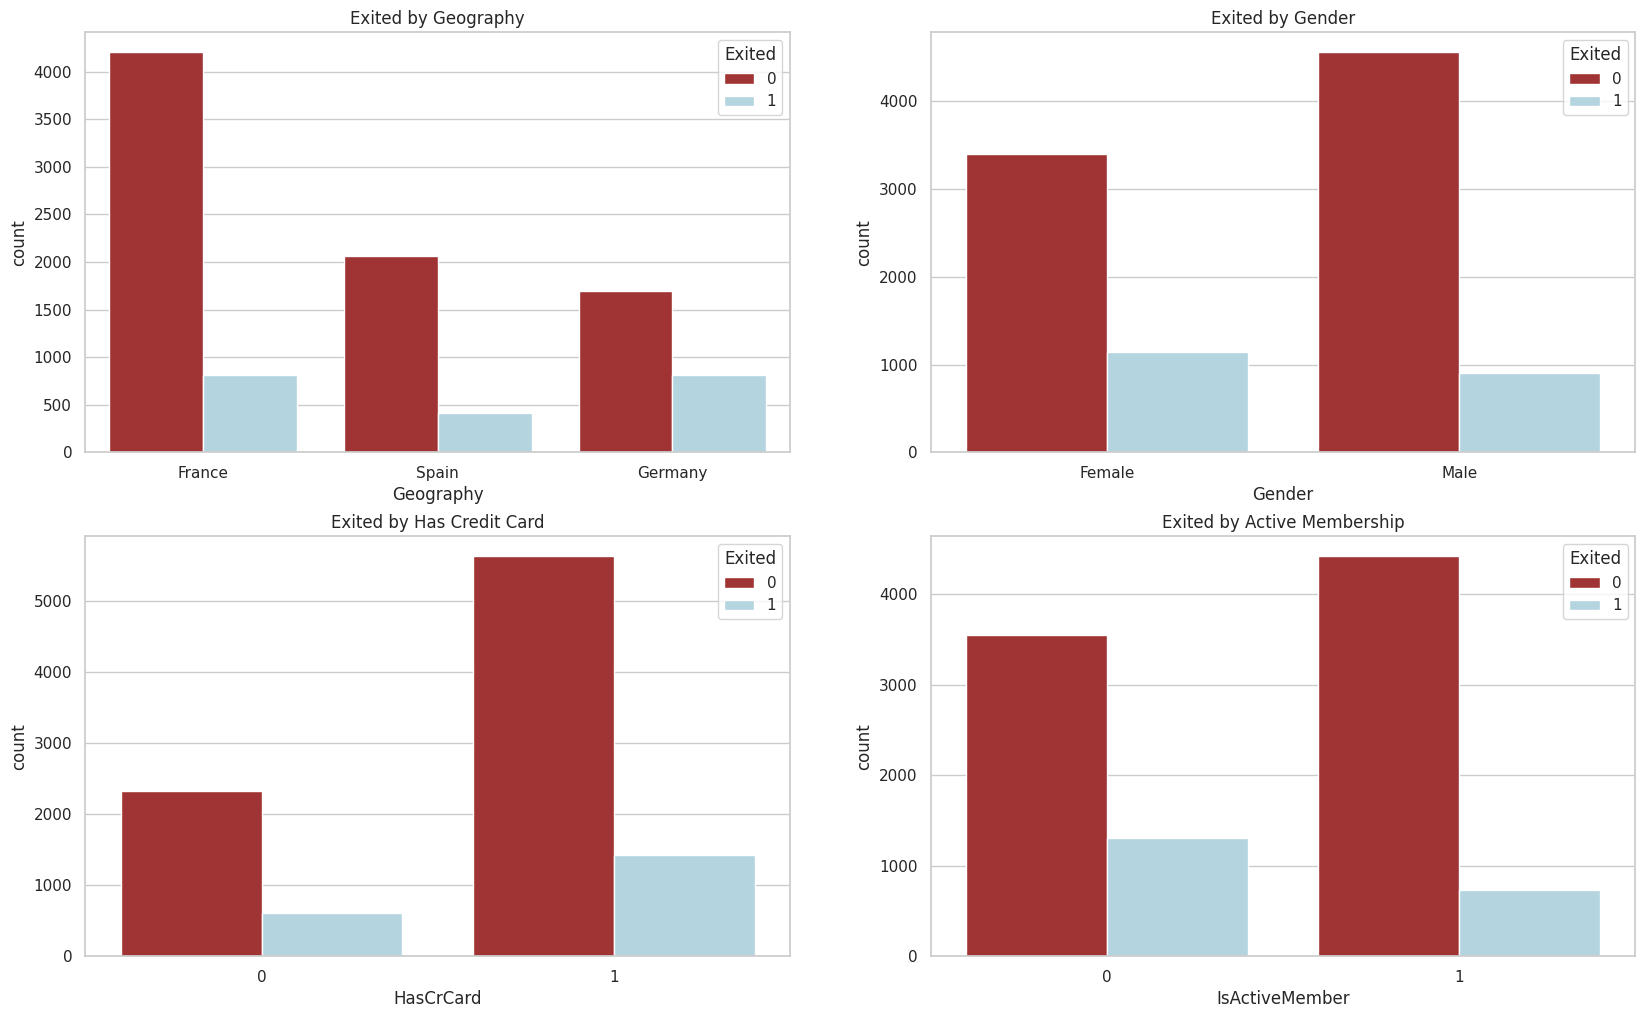

In [200]:
# Explore the relationship between churn and other variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue='Exited', data=data, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=axarr[1][1])

# Set titles for each subplot
axarr[0][0].set_title('Exited by Geography')
axarr[0][1].set_title('Exited by Gender')
axarr[1][0].set_title('Exited by Has Credit Card')
axarr[1][1].set_title('Exited by Active Membership')

plt.show()

Geography: Most customers are from France, but the proportion of churned customers is higher in areas with fewer clients. This suggests a possible issue with customer service resource allocation in these regions.

Gender: The proportion of female customers churning is higher than that of male customers. This could indicate that specific issues or dissatisfaction among female customers need to be addressed.

Credit Cards: Most customers who churn have credit cards. While this could be coincidental due to the majority of customers having credit cards, it's worth investigating whether there are any specific issues or dissatisfaction related to credit card services.

Active Membership: Inactive members have a higher churn rate. Since the overall proportion of inactive members is relatively high, implementing programs to turn this group into active customers could positively impact customer churn.

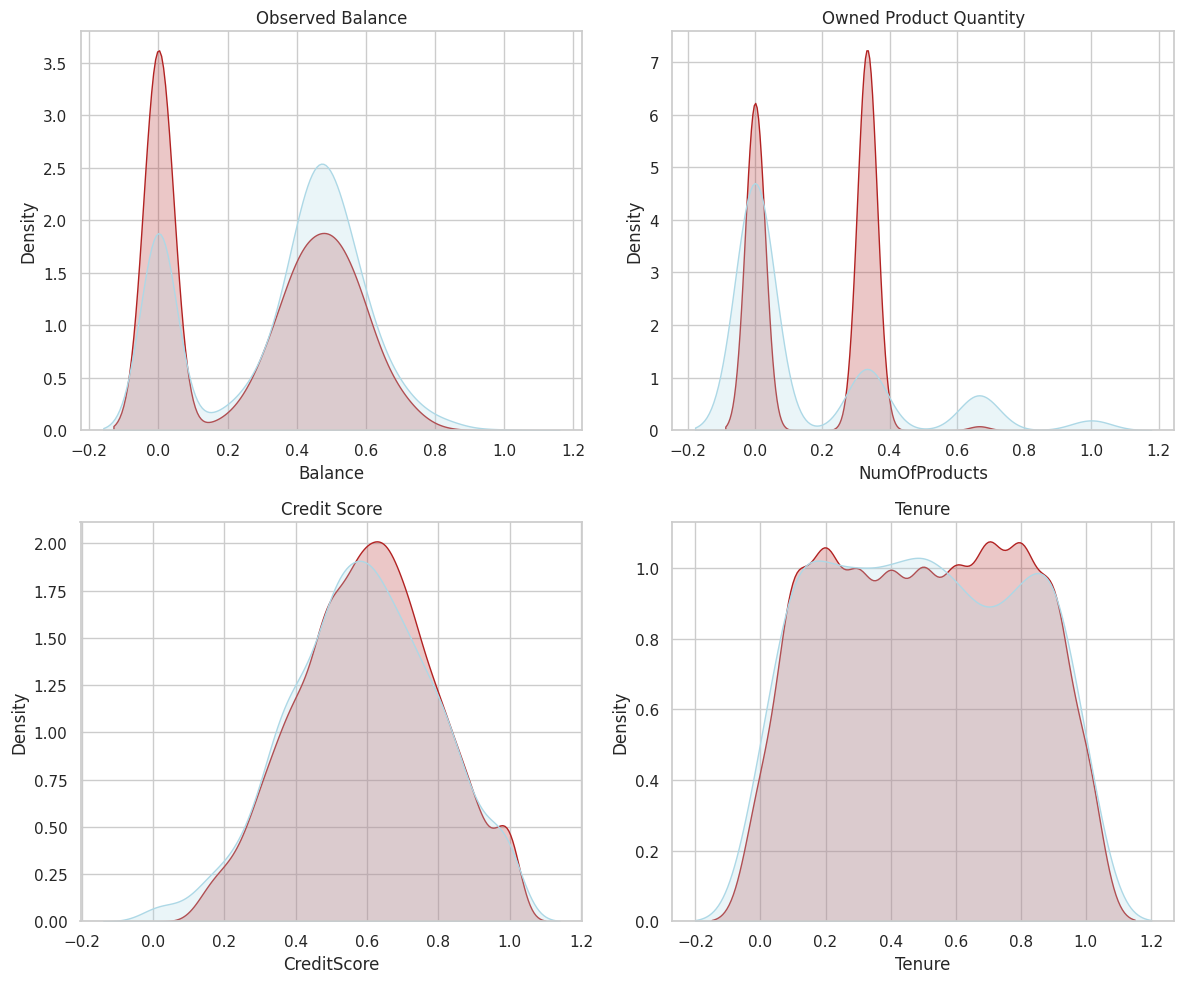

In [201]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot density plots for each feature with churn
sns.kdeplot(data_train[data_train['Exited'] == 0]['Balance'], shade=True, ax=axs[0, 0], label='Not Churned')
sns.kdeplot(data_train[data_train['Exited'] == 1]['Balance'], shade=True, ax=axs[0, 0], label='Churned')
axs[0, 0].set_title('Observed Balance')

sns.kdeplot(data_train[data_train['Exited'] == 0]['NumOfProducts'], shade=True, ax=axs[0, 1], label='Not Churned')
sns.kdeplot(data_train[data_train['Exited'] == 1]['NumOfProducts'], shade=True, ax=axs[0, 1], label='Churned')
axs[0, 1].set_title('Owned Product Quantity')

sns.kdeplot(data_train[data_train['Exited'] == 0]['CreditScore'], shade=True, ax=axs[1, 0], label='Not Churned')
sns.kdeplot(data_train[data_train['Exited'] == 1]['CreditScore'], shade=True, ax=axs[1, 0], label='Churned')
axs[1, 0].set_title('Credit Score')

sns.kdeplot(data_train[data_train['Exited'] == 0]['Tenure'], shade=True, ax=axs[1, 1], label='Not Churned')
sns.kdeplot(data_train[data_train['Exited'] == 1]['Tenure'], shade=True, ax=axs[1, 1], label='Churned')
axs[1, 1].set_title('Tenure')

plt.tight_layout()

plt.show()

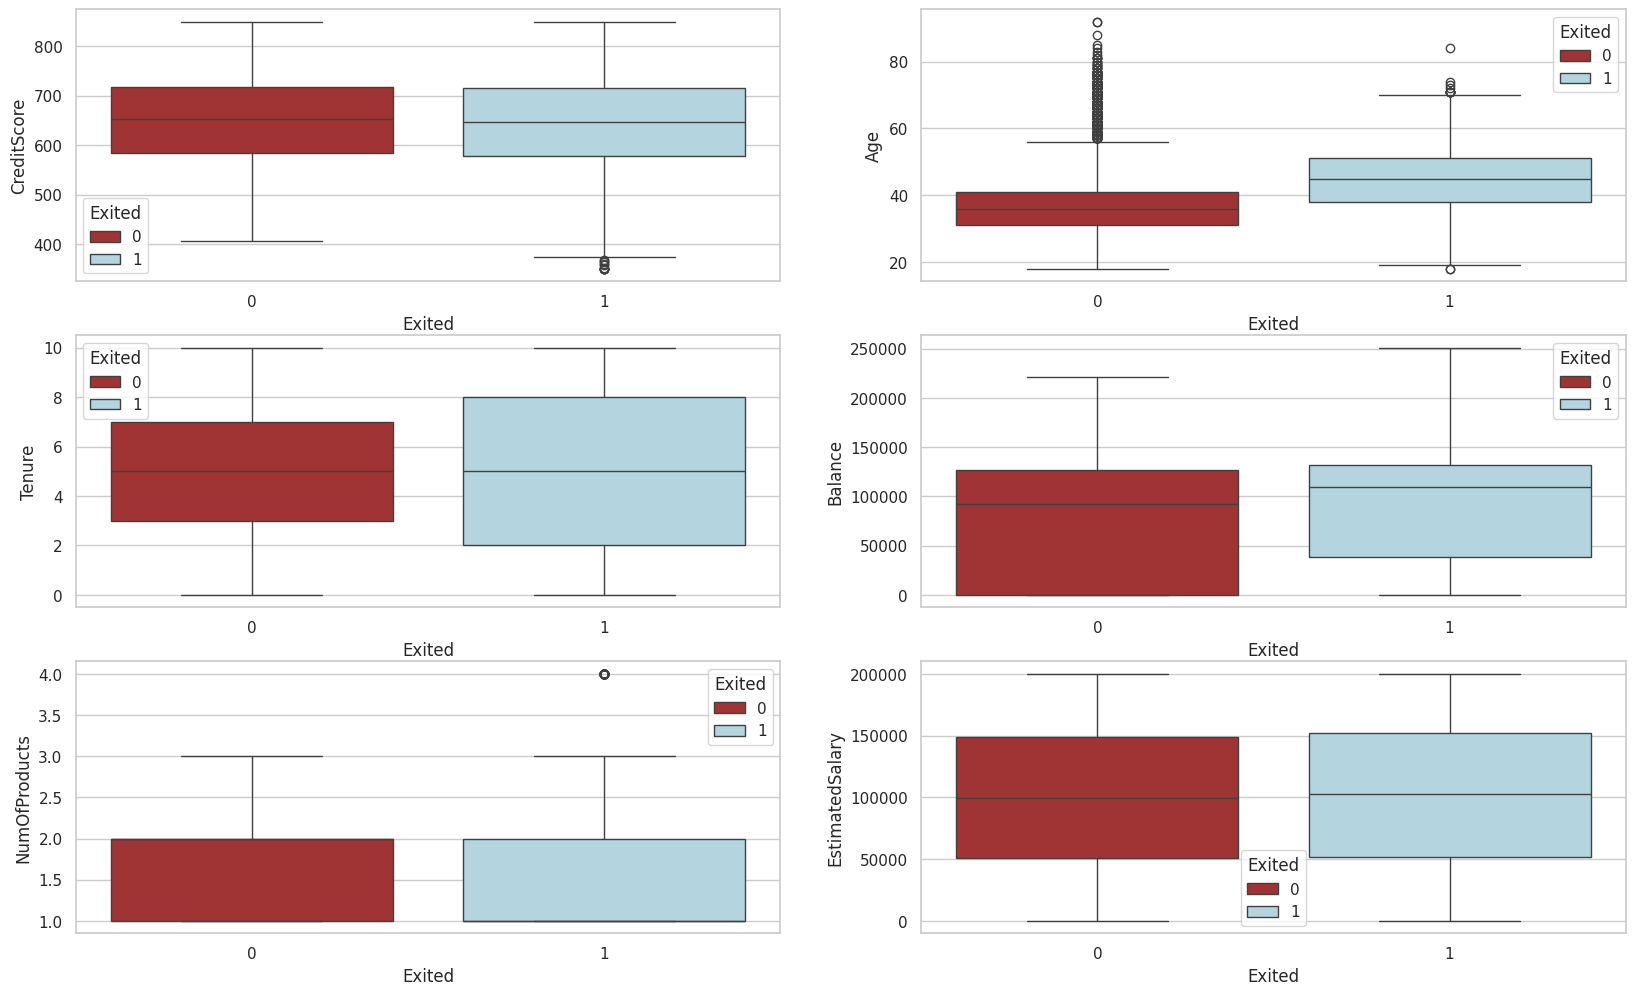

In [202]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=data, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=data, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=data, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=data, ax=axarr[2][1])

plt.show()

Credit Score: There is no significant difference in the credit score distribution between retained and churned customers. This suggests that credit score may not be a significant factor influencing churn.

Age: Older customers are churning more than younger ones, indicating potential differences in service preferences among age groups. The bank may need to review its target market or adjust its retention strategies for different age groups accordingly.

Tenure: Customers with extreme tenure (either very short or very long) are likelier to churn than those with average tenure. This highlights the importance of maintaining engagement and satisfaction throughout the customer lifecycle, regardless of tenure.

Balance: Customers with significant bank balances are churning, which could impact the bank's available capital for lending. It's essential for the bank to understand the reasons behind this churn and take steps to address them, potentially through tailored retention strategies for high-balance customers.

Number of Products and Salary: Neither the number of products nor the salary significantly affects the likelihood of churn. This suggests that factors other than product offerings or income may drive customer churn.

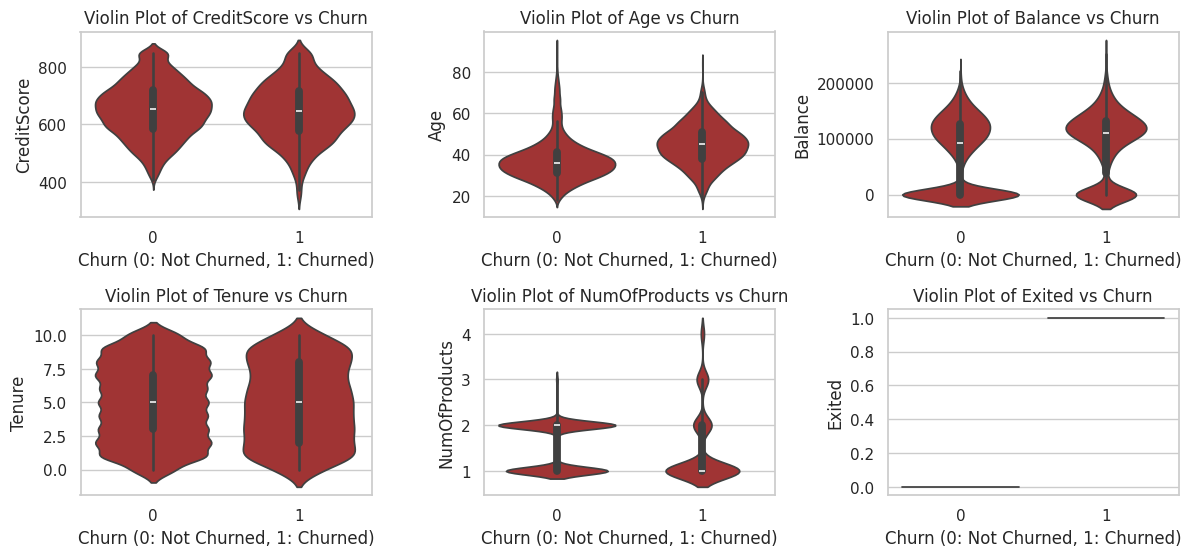

In [203]:
# Define numerical_features
numerical_features = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'Exited']

# Plotting using violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Exited', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} vs Churn')
    plt.xlabel('Churn (0: Not Churned, 1: Churned)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

<Figure size 400x400 with 0 Axes>

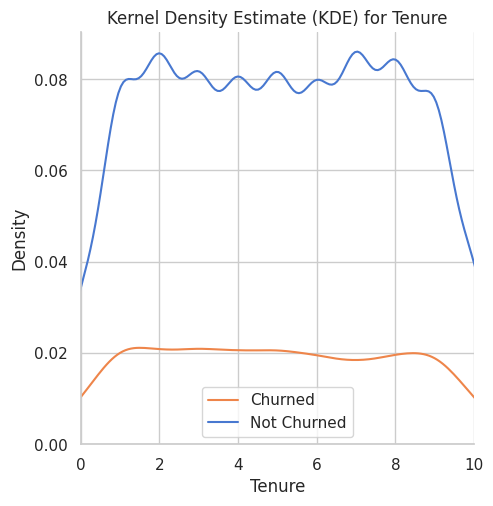

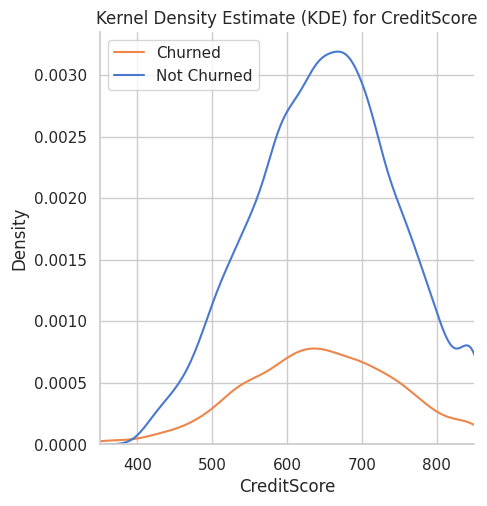

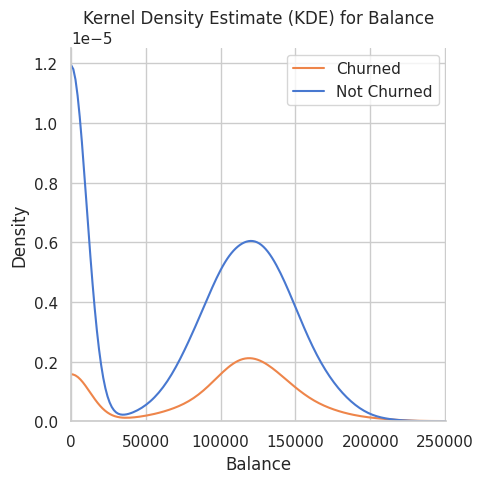

In [204]:
features = ['Tenure', 'CreditScore', 'Balance']
plt.figure(figsize=(4, 4))
for i, feature in enumerate(features):
    sns.displot(data, x=feature, hue="Exited", kind="kde",legend=False, palette='muted')
    plt.title(f'Kernel Density Estimate (KDE) for {feature}')
    plt.legend(['Churned', 'Not Churned'])
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Set x-axis limits to match the Tenure data range
    plt.xlim(data[feature].min(), data[feature].max())


plt.tight_layout()
plt.show()

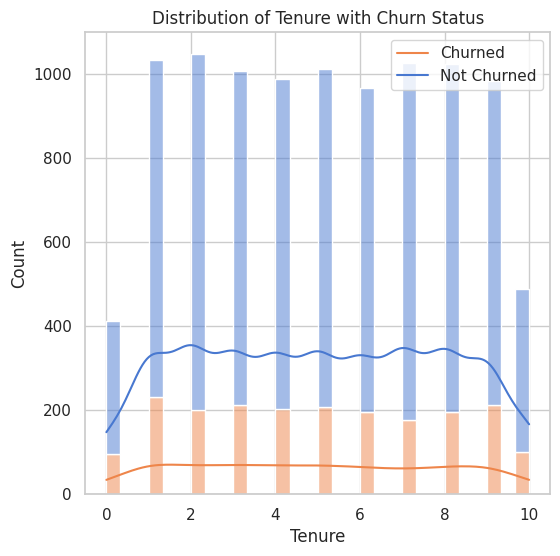

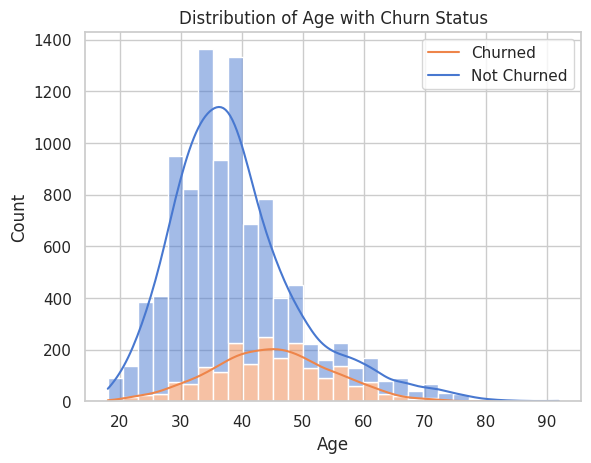

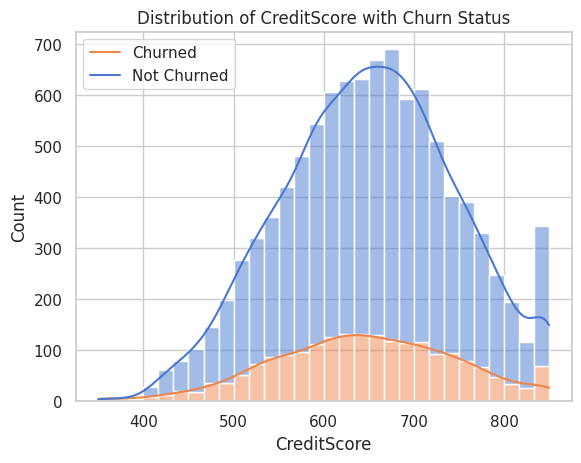

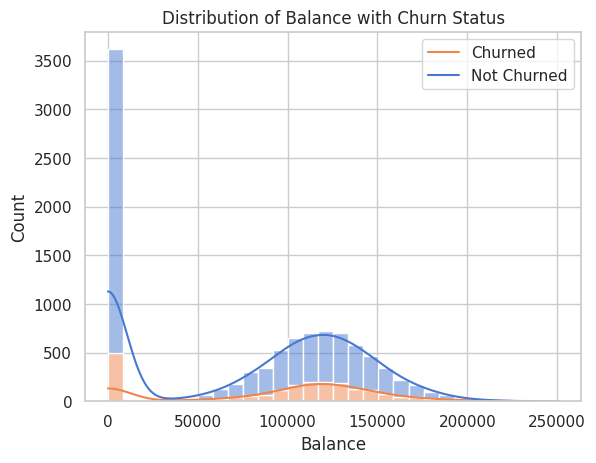

<Figure size 640x480 with 0 Axes>

In [205]:
# Set the style of seaborn
sns.set(style="whitegrid")

# make list of required features
features = ['Tenure','Age','CreditScore','Balance']

plt.figure(figsize=(6, 6))
for i, feature in enumerate(features):
  sns.histplot(data=data, x=feature, hue="Exited", kde=True, bins=30, palette='muted', multiple="stack")
  plt.title(f'Distribution of {feature} with Churn Status')
  plt.legend(['Churned', 'Not Churned'])
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()
  print('\n\n')

plt.tight_layout()

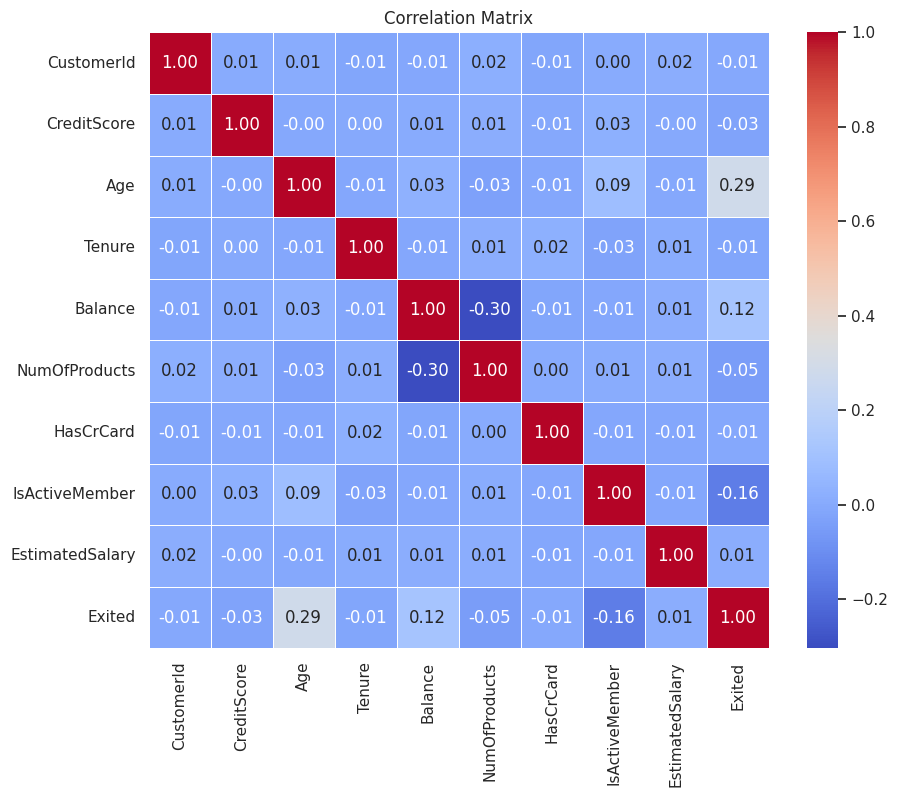

In [206]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

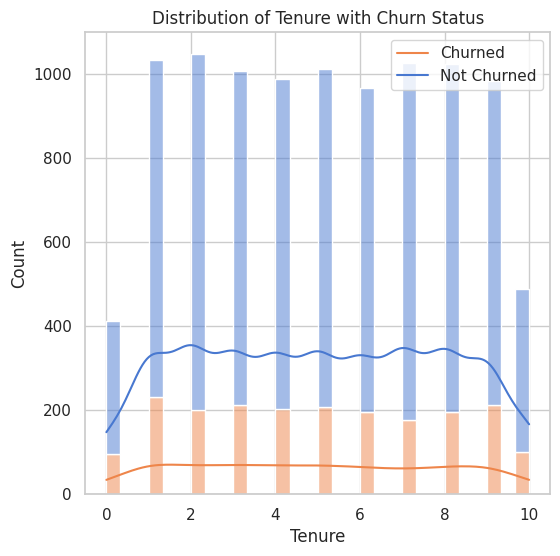

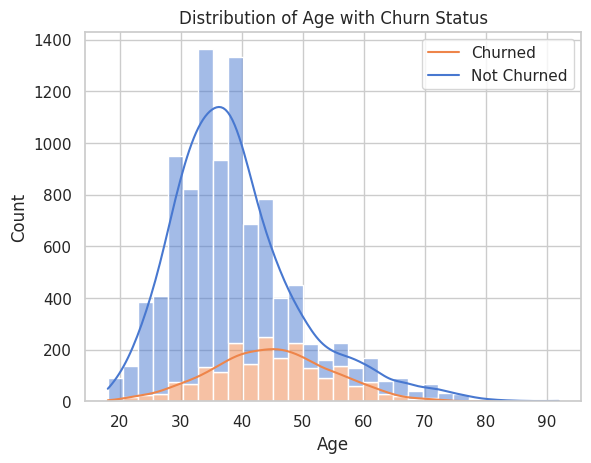

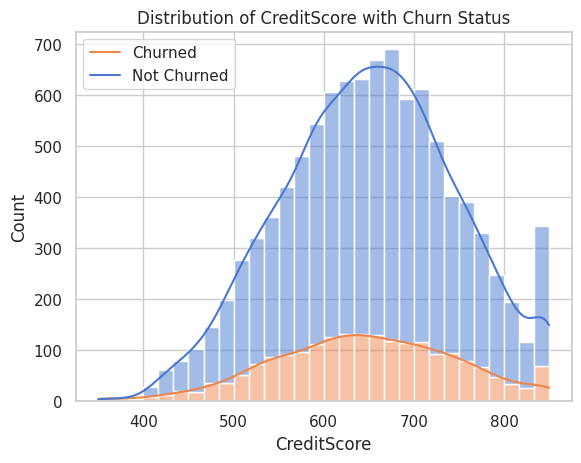

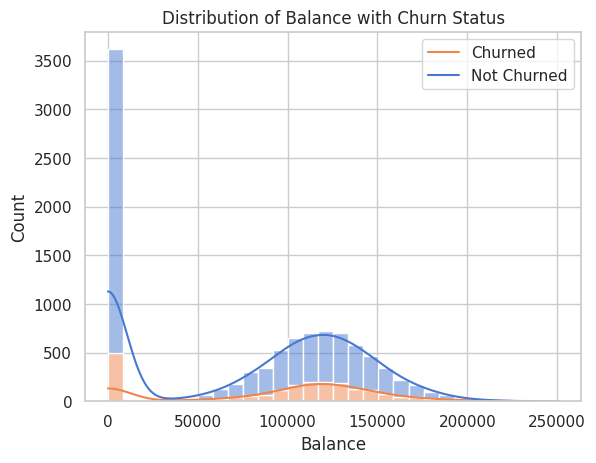

<Figure size 640x480 with 0 Axes>

In [207]:
# Make list of required features
features = ['Tenure','Age','CreditScore','Balance']

plt.figure(figsize=(6, 6))
for i, feature in enumerate(features):
  sns.histplot(data=data, x=feature, hue="Exited", kde=True, bins=30, palette='muted', multiple="stack")
  plt.title(f'Distribution of {feature} with Churn Status')
  plt.legend(['Churned', 'Not Churned'])
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()
  print('\n\n')

plt.tight_layout()

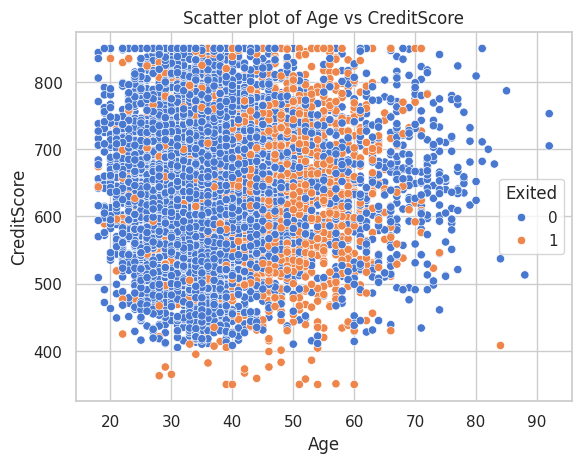

In [208]:
# Scatter plot between 'Age' and 'CreditScore'
sns.scatterplot(data=data, x='Age', y='CreditScore', hue='Exited', palette='muted')
plt.title('Scatter plot of Age vs CreditScore')
plt.show()

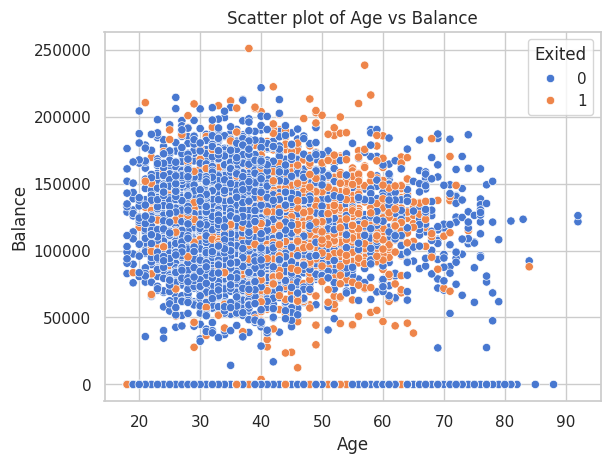

In [209]:
# Scatter plot between 'Age' and 'Balance'
sns.scatterplot(data=data, x='Age', y='Balance', hue='Exited', palette='muted')
plt.title('Scatter plot of Age vs Balance')
plt.show()

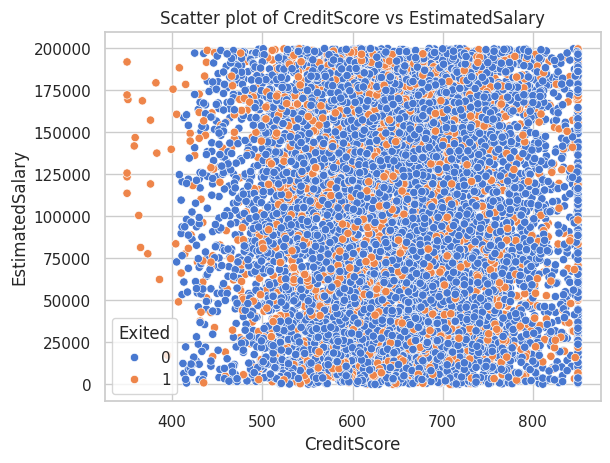

In [210]:
# Scatter plot between 'CreditScore' and 'EstimatedSalary'
sns.scatterplot(data=data, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='muted')
plt.title('Scatter plot of CreditScore vs EstimatedSalary')
plt.show()

# **MODELS**

In [211]:
# import packages required for creating, running and analysing models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, f1_score
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter


import warnings
warnings.filterwarnings("ignore")

In [212]:
# Create a function to train a model and evaluate scores
def RunModel(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cr_v_sc = cross_val_score(model, x_train, y_train, cv=cv, scoring='roc_auc')
    r_a_s = roc_auc_score(y_test, pred)
    return accuracy_score(y_test, pred), r_a_s, np.mean(cr_v_sc), f1_score(y_test, pred)

# Create a function to evaluate model performance
def model_evaluation(model,x_test,y_test):

    cm = confusion_matrix(y_test,model.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.3%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['#20B2AA','#48D1CC'],fmt ='')

    print(classification_report(y_test,model.predict(x_test)))

In [213]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_data, tpr_data, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_data, tpr_data)

# Logistic Regression

In [214]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

over = SMOTE(sampling_strategy=1)
X = data.drop(columns=['Exited']).values
Y = data['Exited'].values

X, Y = over.fit_resample(X, Y)
Counter(Y)

Counter({1: 7963, 0: 7963})

In [215]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)

In [216]:
# Initializing  and training model using function

LogisticRegressionModel = LogisticRegression()

RunModel(LogisticRegressionModel,x_train,y_train,x_test,y_test)

(0.5751360401841775,
 0.5754500574004533,
 0.5783213115540798,
 0.6156758803483529)

              precision    recall  f1-score   support

           0       0.60      0.47      0.53      2396
           1       0.56      0.68      0.62      2382

    accuracy                           0.58      4778
   macro avg       0.58      0.58      0.57      4778
weighted avg       0.58      0.58      0.57      4778



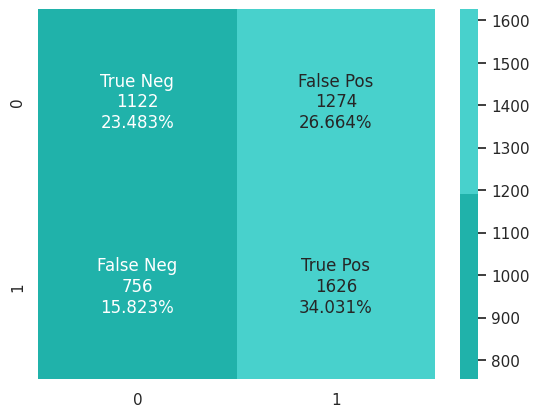

In [217]:
# Model evaluation using function
model_evaluation(LogisticRegressionModel,x_test,y_test)

# SVC

In [218]:
x = data.drop(columns=['Exited'])
y = data['Exited']

In [219]:
#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [220]:
#Initialize the SVC model with desired parameters
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svc_model.fit(x_train, y_train)

SVC(random_state=42)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



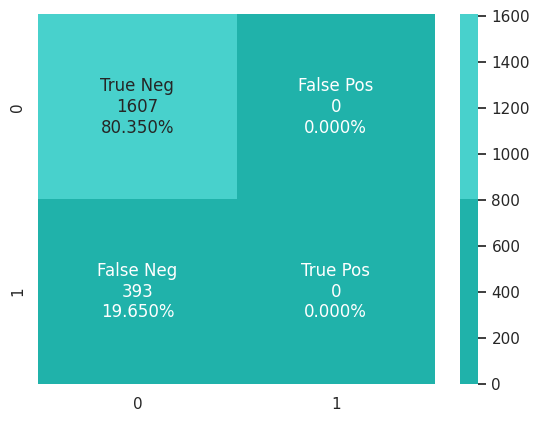

In [221]:
model_evaluation(svc_model,x_test,y_test)

# Random Forest Classifier

In [222]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)

In [223]:
RandomForestClassifierModel = RandomForestClassifier()

RunModel(RandomForestClassifierModel,x_train,y_train,x_test,y_test)

(0.9104227710339055,
 0.9103349200809074,
 0.9619546161838477,
 0.9073993942016443)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2396
           1       0.94      0.88      0.91      2382

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



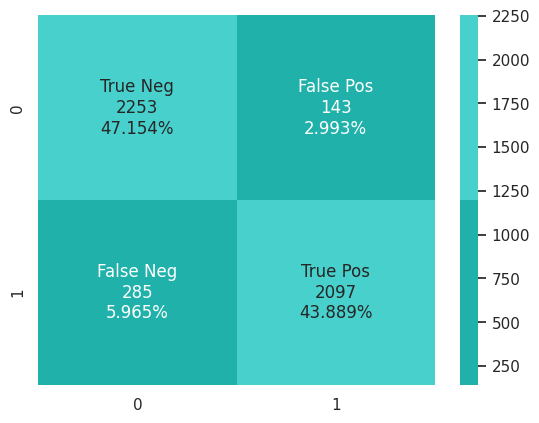

In [224]:
model_evaluation(RandomForestClassifierModel,x_test,y_test)

# XG BOOST ALGORITHM

In [225]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

In [228]:
RunModel(xgb_model,X_train,y_train,X_test,y_test)

(0.8655, 0.7211951212174472, 0.8610636530247343, 0.5855161787365176)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



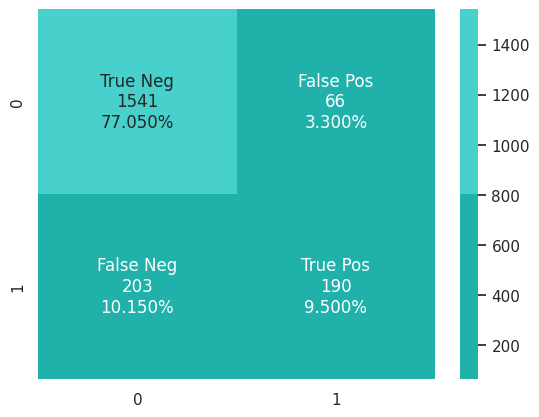

In [229]:
model_evaluation(xgb_model,X_test,y_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

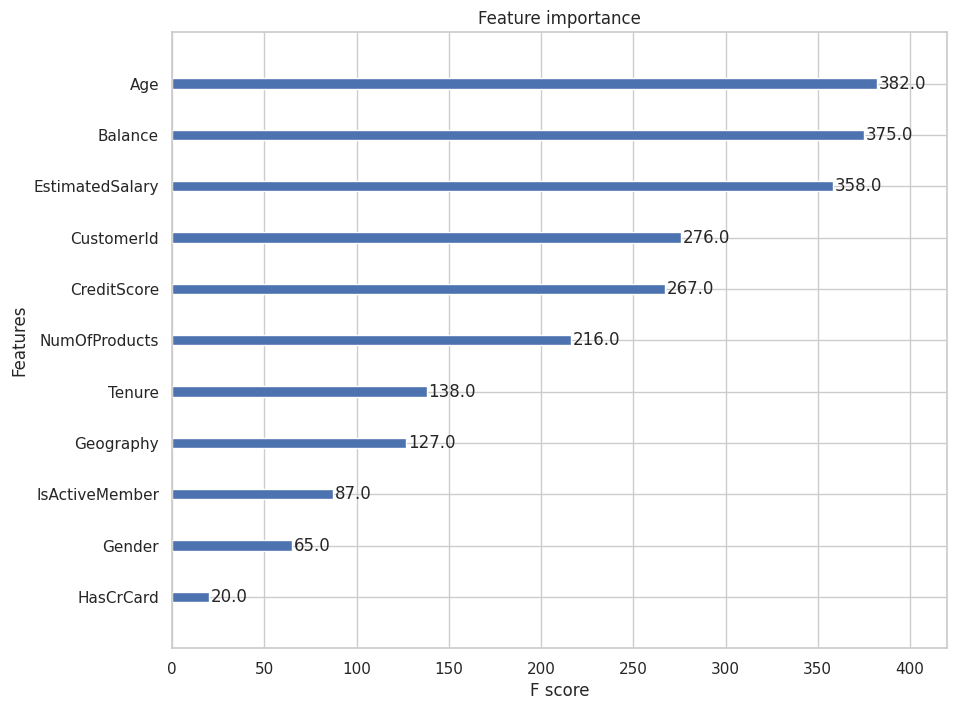

In [230]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

Based on the analysis of the fitted models, my primary objective is to predict customers who are likely to churn, enabling proactive measures to prevent churn. Therefore, the recall metric for predicting churned customers (label 1) holds more significance than the overall accuracy score of the model.

Given that only 20% of the data represents churn instances, achieving a recall higher than this baseline is considered an improvement. However, the aim is to maximize recall while maintaining a high precision to ensure efficient allocation of resources by the bank towards identified clients without allocating excessive resources to false positives.

Among the reviewed models, the random forest model demonstrates the most favorable balance between recall and precision. On the training set, it achieves a precision score of 0.97 for churned customers, indicating that out of all customers predicted to churn, 97% actually do churn. Additionally, it achieves a recall score of 0.87 for churned customers, meaning it correctly identifies 87% of all customers who churned. This suggests that the random forest model effectively identifies a significant portion of churned customers while minimizing false positives, making it a suitable choice for deployment in practice.